In [1]:
!jupyter nbconvert --to script ./print_model.ipynb

[NbConvertApp] Converting notebook ./print_model.ipynb to script
[NbConvertApp] Writing 336 bytes to ./print_model.py


In [1]:
a = {}

In [3]:
a['2'] = 3

In [4]:
a

{'2': 3}

In [1]:
import os
os.chdir('/workspace/my_cyclegan')

from options.train_options import TrainOptions
from dataloader import create_dataset
from models import create_model
from util.visualizer import Visualizer

import time
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
opt = TrainOptions().parse(isCodeCheck=True)
opt.name = 'mean_matching_mask_5depthloss'
opt.use_second_cycle = True
opt.use_mean_matching = True
opt.load_epoch = 6
opt.continue_train = True
opt.data_shuffle = True
opt.batch_size = 8
opt.lr_D = 0.0002
opt.lr_G = 0.0001
torch.cuda.set_device(opt.gpu_ids[0])


----------------- Options ---------------
               batch_size: 5                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
             data_shuffle: False                         
                 dataroot: /all_data/hdd/un_depth/semi/sample
             dataset_mode: semi_cycle                    
            deterministic: False                         
         disc_for_normals: False                         
                  dropout: False                         
              epoch_count: 1                             
                 gan_mode: lsgan                         
                  gpu_ids: 0,1                           
                 img_freq: 1                             
                init_type: normal                        
           input_nc_depth:

In [3]:
opt

Namespace(batch_size=8, beta1=0.5, checkpoints_dir='./checkpoints', continue_train=True, crop_size=256, data_shuffle=True, dataroot='/all_data/hdd/un_depth/semi/sample', dataset_mode='semi_cycle', deterministic=False, disc_for_normals=False, dropout=False, epoch_count=1, gan_mode='lsgan', gpu_ids=[0, 1], img_freq=1, init_type='normal', input_nc_depth=1, input_nc_img=3, isTrain=True, l_cycle_A_begin=10.0, l_cycle_A_end=10.0, l_cycle_B_begin=10.0, l_cycle_B_end=10.0, l_depth_A_begin=5.0, l_depth_A_end=0.0, l_depth_B_begin=5.0, l_depth_B_end=0.0, l_depth_max_iter=5000, l_identity=0.0, l_reconstruction_semantic=0.0, load_epoch=6, load_iter=0, load_size_h=480, load_size_w=640, loss_freq=1, lr_D=0.0002, lr_G=0.0001, lr_decay_iters=50, lr_policy='linear', max_dataset_size=inf, max_distance=8000.0, model='semi_cycle_gan', n_blocks=9, n_downsampling=2, n_epochs=1, n_epochs_decay=1, n_layers_D=3, n_pic=3, name='mean_matching_mask_5depthloss', ndf=64, netD='n_layers', ngf_depth=32, ngf_img=32, no

In [4]:
dataset = create_dataset(opt)  
dataset_size = len(dataset)    # get the number of images in the dataset.
print('The number of training images = %d' % dataset_size)
vis = Visualizer(opt)

Dataset SemiCycleDataset was created
The number of training images = 20000


In [5]:
model = create_model(opt)      # create a model given opt.model and other options
model.setup()

initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
model [SemiCycleGANModel] was created
loading the model from ./checkpoints/mean_matching_mask_5depthloss/6_netG_A.pth
loading the model from ./checkpoints/mean_matching_mask_5depthloss/6_netG_B.pth
loading the model from ./checkpoints/mean_matching_mask_5depthloss/6_netD_A_depth.pth
loading the model from ./checkpoints/mean_matching_mask_5depthloss/6_netD_B_depth.pth
---------- Networks initialized -------------
[Network netG_A] Total number of parameters : 11.328 M
[Network netG_B] Total number of parameters : 11.652 M
[Network netD_A_depth] Total number of parameters : 2.763 M
[Network netD_B_depth] Total number of parameters : 2.763 M
-----------------------------------------------


In [6]:
for data in dataset:
    model.set_input(data)
    model.optimize_param()
#     vis.plot_a2b(model.get_current_vis())
    break

In [13]:
model.get_current_losses()

OrderedDict([('D_A_depth', nan),
             ('D_B_depth', nan),
             ('G_A', nan),
             ('G_B', nan),
             ('cycle_A', 0.48907947540283203),
             ('cycle_B', 2.061032295227051),
             ('depth_range_A', 0.5395360589027405),
             ('depth_range_B', 1.2941814661026)])

In [25]:
model.netD_A_depth.module

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)

In [30]:
for n, p in model.netD_A_depth.module.named_parameters():
    if torch.isnan(p).any():
        raise RuntimeError('Nan')

RuntimeError: Nan

In [37]:
for name, param in model.netD_A_depth.module.named_parameters():
    print(name, torch.isnan(param.grad).any())

model.0.weight tensor(True, device='cuda:0')
model.0.bias tensor(True, device='cuda:0')
model.2.weight tensor(True, device='cuda:0')
model.2.bias tensor(True, device='cuda:0')
model.5.weight tensor(True, device='cuda:0')
model.5.bias tensor(True, device='cuda:0')
model.8.weight tensor(True, device='cuda:0')
model.8.bias tensor(True, device='cuda:0')
model.11.weight tensor(True, device='cuda:0')
model.11.bias tensor(True, device='cuda:0')


In [5]:
data['A_semantic'].dtype

torch.int64

In [22]:
a = torch.tensor([True, False])

In [24]:
torch.sum(a)

tensor(1)

In [6]:
import imageio
import matplotlib.pyplot as plt

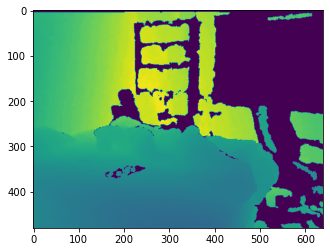

In [11]:
a = imageio.imread('/all_data/hdd/un_depth/semi/sample/testA/depth/scene0092_01_200.png')
plt.imshow(a)

In [1]:
import os
os.chdir('/workspace/my_cyclegan')

In [6]:
# !python train.py --dataroot /all_data/hdd/un_depth/semi/sample\
# --gpu_ids 1\
# --name test\
# --gan_mode vanilla\
# --use_blur\
# --netG resnet_6blocks\
# --ngf_depth 20\
# --ngf_rgb 32\
# --ngf_depth_edge 16\
# --ndf 64\
# --netD n_layers\
# --n_layers_D 3\
# --l_depth_large_A 70\
# --l_depth_small_A 70\
# --l_depth_large_B 10\
# --l_depth_small_B 10\
# --l_depth_max_iter 30000\
# --lambda_cycle_A 5.0\
# --lambda_identity 2.5\
# --lambda_reconstruction 0.0\
# --max_dataset_size 18\
# --batch_size 6\
# --load_size_h 480\
# --load_size_w 640\
# --lr_D 0.0003\
# --lr_G 0.0002\
# --num_iter_gen 3\
# --norm instance\
# --init_type xavier\
# --beta1 0.5\
# --img_freq 1\
# --loss_freq 1\
# --save_epoch_freq 10\
# --n_epochs 10\
# --n_epochs_decay 5\
# # --netG_d2e unet_256\
# # --net_d2e_weights './checkpoints/depth_edge_unet_1.5_weight_binatyloss/last_netG_B.pth'\